## K-means
- 数据集
$$sklearn.datasets.make\_blobs$$

- 损失函数 
$$L(c)=\sum\limits^c_{j=1}\sum\limits_{i \in c_j}||x_i-\overline{x_{c_j}}||_2^2$$

- 输出
$$C^*=\mathop{\arg\min}_{c}L(c)$$

In [1]:
import math
import warnings
import numpy as np
import pandas as pd
from numpy import linalg as LA
import matplotlib.pyplot as plt
from functools import reduce
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')

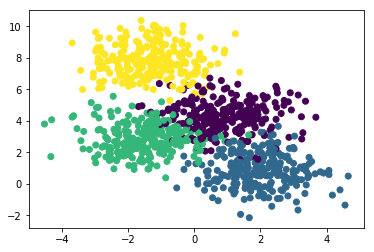

In [2]:
X,Y=make_blobs(n_samples=1000,n_features=2,centers=4,random_state=0)
plt.scatter(X[:,0],X[:,1],c=Y)

In [3]:
class k_means():
    def __init__(self,K,epoch):
        self.K=K
        self.epoch=epoch
        
    def fit_transform(self,X,n_sample):
        y=np.tile([-1],n_sample)
        id,vis=[],np.zeros(n_sample)
        for i in range(self.K):
            u=np.random.randint(n_sample)
            while vis[u]==1:
                u=np.random.randint(n_sample)
            id.append(X[u])
            y[u]=i
        for epoch in range(self.epoch):
            for x in range(n_sample):
                v=-1
                for i,t in enumerate(id):
                    tmp=LA.norm(X[x]-t)**2
                    if v==-1:
                        u,v=tmp,i
                    elif tmp<u:
                        u,v=tmp,i
                y[x]=v
            id=[]
            for i in range(self.K):
                tmp=X[y==i]
                x=reduce(lambda x,y:x+y,tmp)/(tmp.shape[0])
                id.append(x)        
        return y  

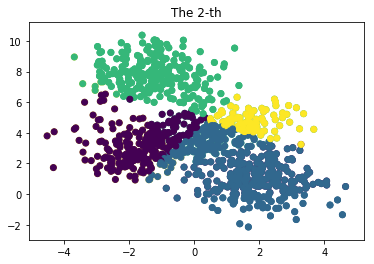

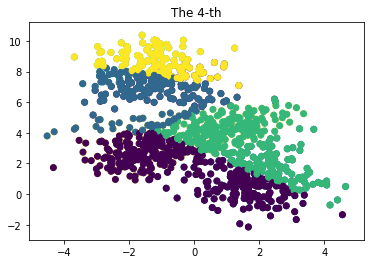

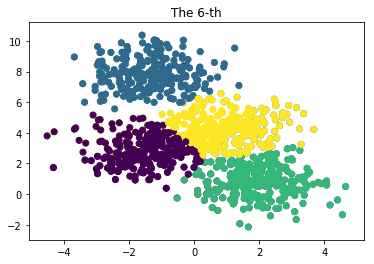

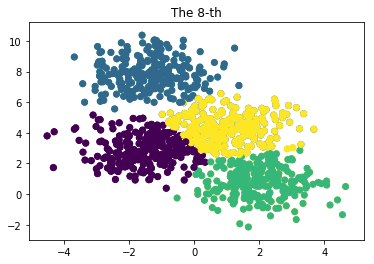

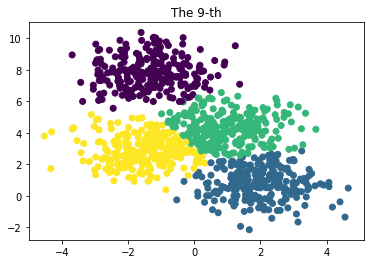

In [4]:
for i in range(1,10):
    K,epoch,n_sample=4,i,X.shape[0]
    clf=k_means(K,epoch)
    y=clf.fit_transform(X,n_sample)
    plt.scatter(X[:,0],X[:,1],c=y)
    plt.title("The "+str(i)+"-th")
    if i%2==0:
        plt.show()